## Metrics Correlation Study
- Group total publication count
- Group head publication count
- Group total citation count
- Group head citation count
- Group total h-index (not available) 
- Group head  h-index (available)
- Kendall Tau, KL-Divergance
    - Topic deviation
    - Hurst exponent
    - Peak count

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from pyfiles.mod_read_researcher_metrics import *
from pyfiles.mod_topic_influence_base import * 

In [3]:
sns.__version__

'0.13.0'

In [4]:
def hurst(ts):
    ts = list(ts)
    N = len(ts)
    if N < 20:
        #raise ValueError("Time series is too short! input series ought to have at least 20 samples!")
        return 0

    max_k = int(np.floor(N/2))
    R_S_dict = []
    for k in range(5,max_k+1):
        R,S = 0,0
        # split ts into subsets
        subset_list = [ts[i:i+k] for i in range(0,N,k)]
        if np.mod(N,k)>0:
            subset_list.pop()
            #tail = subset_list.pop()
            #subset_list[-1].extend(tail)
        # calc mean of every subset
        mean_list=[np.mean(x) for x in subset_list]
        for i in range(len(subset_list)):
            cumsum_list = pd.Series(subset_list[i]-mean_list[i]).cumsum()
            R += max(cumsum_list)-min(cumsum_list)
            S += np.std(subset_list[i])
        R_S_dict.append({"R":R/len(subset_list),"S":S/len(subset_list),"n":k})
    
    log_R_S = []
    log_n = []
    #print(R_S_dict)
    for i in range(len(R_S_dict)):
        R_S = (R_S_dict[i]["R"]+np.spacing(1)) / (R_S_dict[i]["S"]+np.spacing(1))
        log_R_S.append(np.log(R_S))
        log_n.append(np.log(R_S_dict[i]["n"]))
    #print(log_R_S)
    #print(log_n)
    Hurst_exponent= np.polyfit(log_n,log_R_S,1)[0]
    return Hurst_exponent

In [5]:
# Min_publ   = 5 #(greater than )
# Group_size = 5 #(greater than equal to)

In [6]:
# topic_model = "./topic_models/topic_model_mathscinet_25_with_all_and_thesis_title.gensim"
# topic_dict  = "./topic_models/dictionary_mathscinet_25_with_all_and_thesis_title.gensim"
# corpus      = "./topic_models/corpus_mathscinet_25_with_all_and_thesis_title.pkl"
# #"topic_model_dblp.gensim", "dictionary_dblp.gensim", "corpus_dblp.pkl"

In [7]:
# print("Running topic influence base")
# filtered_groups, filtered_grp_member_cy, mgpid2publ_count, group_publication_titles, mgp_nodes, mgp_edges= group_info(Group_size) 
# # with publication constraint for advisor and advisee
# #     filtered_groups, filtered_grp_member_cy, mgpid2publ_count, group_publication_titles, mgp_nodes, mgp_edges=
# #     group_info_without_constraint(5)
# print(f"Total filtered groups: {len(filtered_groups)}")
# #lda_model, id2word = load_topic_model()
# lda_model, id2word = load_topic_model(topic_model, topic_dict, corpus)
# lda_model.minimum_probability = 0.0
# num_topics= lda_model.num_topics

In [8]:
# group_head_id = [k for k,v in group_publication_titles.items() if len(v) > Min_publ]
# topic_distribution_year = [(topic_distributions_over_interval((k,v), lda_model, id2word, prepare_text_for_lda)) 
#                            for k,v in group_publication_titles.items() if len(v) > Min_publ]
# interval_start_year = [i[0] for i in topic_distribution_year]
# topic_distribution  = [i[1] for i in topic_distribution_year]
# aggregated_distribution_topic_rank = [aggregate_dist_over_interval(dist=dist, i=i, rank=True, no_of_topics= num_topics) for i, dist in enumerate(topic_distribution)]
# aggregated_distribution = [elem[0] for elem in aggregated_distribution_topic_rank]
# topic_with_value        = [elem[1] for elem in aggregated_distribution_topic_rank]
# topic_rank = [[[value[0] for value in interval] for interval in researcher] 
#               for researcher in topic_with_value] #changed
# metric_distance_kl  = [get_distance_over_interval(dist, i, kl_divergance) 
#                       for i, dist in enumerate(aggregated_distribution)]
# metric_distance_tau = [get_distance_over_interval(rank, i, modified_jaccard_index) 
#                        for i, rank in enumerate(topic_rank)]
# norm_distance_kl    = [list(np.array(metrics)/np.sum(metrics)) if sum(metrics) > 0.0 else metrics 
#                        for metrics in metric_distance_kl]
# norm_distance_tau   = [list(np.array(metrics)/np.sum(metrics)) if sum(metrics) > 0.0 else metrics 
#                        for metrics in metric_distance_tau]
# assert len(interval_start_year) == len(aggregated_distribution) == len(metric_distance_kl) == len(metric_distance_tau) == len(group_head_id) == len(norm_distance_kl)==len(norm_distance_tau)
# print(f"Number of groups (Publication count > {Min_publ}): {len(group_head_id)}")

In [9]:
%store -r group_publication_titles
# %store -r topic_with_value
# %store -r topic_rank
%store -r norm_distance_kl
%store -r norm_distance_tau
%store -r group_head_id
%store -r filtered_groups
%store -r mgp_nodes
#%store -r aggregated_distribution

In [10]:
%store -r lda_model
%store -r id2word
%store -r prepare_text_for_lda

In [11]:
id2word[456]

'finit'

In [12]:
lda_model.get_topic_terms(1)

[(36, 0.1219308),
 (456, 0.041087307),
 (37, 0.033726986),
 (156, 0.028074581),
 (251, 0.027854038),
 (260, 0.02592542),
 (67, 0.025033481),
 (14, 0.016966991),
 (83, 0.016631933),
 (56, 0.015979314)]

In [13]:
len(group_head_id)

15433

In [14]:
#pr, bc = get_graph_metrics()

In [15]:
hindex,mgpid2coauthor,mgpid2citation_count,mgpid2publ_count,mgpid2_name_variation,mgpid2_publ_area = get_metrics()

Initial Count: 8727
updated Count: 9128


In [16]:
null_values = np.nan

In [17]:
mgpid2publarea_count     = {k: len(v) if type(v)==list else null_values for k,v in mgpid2_publ_area.items()}

In [18]:
#mgpid2publarea_count.values()

In [19]:
len(mgpid2publarea_count)-len([i for i in mgpid2publarea_count.values() if np.isnan(i)])

144439

In [20]:
mgpid2coauthor_count     = {k: len(v) for k,v in mgpid2coauthor.items()}

In [21]:
mod_mgpid2citation_count = {k: v if v > 0 else null_values for k,v in mgpid2citation_count.items()}

In [22]:
len(mod_mgpid2citation_count)-len([i for i in mod_mgpid2citation_count.values() if np.isnan(i)])

122604

In [23]:
mod_mgpid2publ_count     = {k: v if v > 0 else null_values for k,v in mgpid2publ_count.items()}

In [24]:
len(mod_mgpid2publ_count)-len([i for i in mod_mgpid2publ_count.values() if np.isnan(i)])

144439

In [25]:
mod_mgpid2coauthor_count = {k: v if v > 0 else null_values for k,v in mgpid2coauthor_count.items()}

In [26]:
len(mod_mgpid2coauthor_count)-len([i for i in mod_mgpid2coauthor_count.values() if np.isnan(i)])

129878

In [27]:
#(3,)+groups[258]

In [28]:
null_values = 0

In [29]:
groups               = {head:filtered_groups[head] for head in group_head_id}

In [30]:
groups_size = {head:len(filtered_groups[head]) for head in group_head_id}

In [31]:
group_publication    = {k:np.sum(0 if pd.isna(mod_mgpid2publ_count.get(r, null_values)) else mod_mgpid2publ_count.get(r, null_values) for r in (k,)+v) for k, v in groups.items()}

In [32]:
group_citation       = {k:np.sum(0 if pd.isna(mod_mgpid2citation_count.get(r, null_values)) else mod_mgpid2citation_count.get(r, null_values) for r in (k,)+v) for k, v in groups.items()}

In [33]:
group_coauthor       = {k:np.sum(0 if pd.isna(mod_mgpid2coauthor_count.get(r, null_values)) else mod_mgpid2coauthor_count.get(r, null_values) for r in (k,)+v) for k, v in groups.items()}

In [34]:
# metric_distance_l2 = [get_distance_over_interval(dist=dist, i=i, func=l2_distance) 
#                       for i, dist in enumerate(aggregated_distribution)]
# norm_distance_l2    = [list(np.array(metrics)/sum(metrics)) if sum(metrics) > 0.0 else metrics 
#                        for metrics in metric_distance_l2]
# metric_std_l2   = {head:np.std(interval) for head, interval in zip(group_head_id,norm_distance_l2)}
# metric_peaks_l2 = {head:len(find_peaks(interval)[0])/len(interval) for head, interval in zip(group_head_id,norm_distance_l2)}

In [35]:
#metric_deviation1= lambda x: np.std(np.diff(x,2))*len(x)

In [36]:
metric_deviation1 = lambda x: np.std(np.diff(x,1))*np.std(x)

In [37]:
metric_deviation  = lambda x: (np.std([abs(d) for d in np.diff(x,1)])*np.std(x))

In [38]:
# Standard Deviation
metric_std_tau  = {head: (0 if pd.isna(metric_deviation(interval)) else metric_deviation(interval)) for head, interval in zip(group_head_id, norm_distance_tau)}
metric_std_kl   = {head: (0 if pd.isna(metric_deviation(interval)) else metric_deviation(interval)) for head, interval in zip(group_head_id, norm_distance_kl)}

/home/dhananjay/final_group_influence/venv3.8/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/dhananjay/final_group_influence/venv3.8/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/dhananjay/final_group_influence/venv3.8/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
#pd.isna(metric_deviation(norm_distance_tau[12614]))

In [40]:
#group_head_id[12614]

In [41]:
#group_publication_titles[54114]

In [42]:
# Peaks
metric_peaks_kl  = {head:(len(find_peaks(interval)[0])) for head, interval in zip(group_head_id, norm_distance_kl)}
metric_peaks_tau = {head:(len(find_peaks(interval)[0])) for head, interval in zip(group_head_id, norm_distance_tau)}

In [43]:
#metric_std_kl

In [44]:
# from scipy.signal import argrelextrema
# findminima_maxima=lambda x: list(argrelextrema(np.array(x), np.less)[0])+list(argrelextrema(np.array(x), np.greater)[0])
# metric_peaks_kl = {head:len(findminima_maxima(interval))/len(interval) for head, interval in zip(group_head_id,norm_distance_kl)}

In [45]:
#from hurst import compute_Hc, random_walk

In [46]:
metric_hurst_exp_kl  = {head: hurst(interval) for head, interval in zip(group_head_id, norm_distance_kl)}
metric_hurst_exp_tau = {head: hurst(interval) for head, interval in zip(group_head_id, norm_distance_tau)}
# metric_hurst_exp_kl = [i for i in metric_hurst_exp_kl if ~np.isnan(i)]

In [47]:
hurst(norm_distance_kl[3])

0.7267736886479181

In [48]:
#list(metric_hurst_exp_kl.values())[0:100]

In [49]:
dataframe                   = pd.DataFrame({"head_id":group_head_id})

In [50]:
dataframe["Co-author"]      = dataframe["head_id"].map(mod_mgpid2coauthor_count)

In [51]:
dataframe["G-coauthor"]     = dataframe["head_id"].map(group_coauthor)

In [52]:
dataframe["Publ"]           = dataframe["head_id"].map(mod_mgpid2publ_count)

In [53]:
dataframe["G-Publ"]         = dataframe["head_id"].map(group_publication)

In [54]:
#dataframe["Topic-Deviation(l2)"]        = dataframe["head_id"].map(metric_std_l2)

In [55]:
dataframe["Citation"]       = dataframe["head_id"].map(mod_mgpid2citation_count)

In [56]:
dataframe["G-citation"]     = dataframe["head_id"].map(group_citation)

In [57]:
#dataframe["Peaks(l2)"]                  = dataframe["head_id"].map(metric_peaks_l2)

In [58]:
#dataframe["Peaks(MJC)"]     = dataframe["head_id"].map(metric_peaks_tau)

In [59]:
#dataframe["TD(MJC)"]        = dataframe["head_id"].map(metric_std_tau)

In [60]:
dataframe["TD"]        = dataframe["head_id"].map(metric_std_kl)

In [61]:
#dataframe["Peaks(KLD)"]     = dataframe["head_id"].map(metric_peaks_kl)

In [62]:
#dataframe["PR"]             = dataframe["head_id"].map(pr)

In [63]:
#dataframe["BC"]             = dataframe["head_id"].map(bc)

In [64]:
#dataframe["HE(KLD)"]        = dataframe["head_id"].map(metric_hurst_exp_kl)

In [65]:
#dataframe["HE(MJC)"]        = dataframe["head_id"].map(metric_hurst_exp_tau)

In [66]:
dataframe["Research areas"] = dataframe["head_id"].map(mgpid2publarea_count)

In [67]:
dataframe["H-index"]        = dataframe["head_id"].map(hindex)

In [68]:
dataframe["G-size"]        = dataframe["head_id"].map(groups_size)

In [70]:
dataframe1 = dataframe[(dataframe["TD"]>0) & ~(dataframe["H-index"].isnull())].copy()

In [71]:
dataframe[~(dataframe["H-index"].isnull())].shape

(5113, 11)

In [72]:
dataframe.count()

head_id           15433
Co-author         14163
G-coauthor        15433
Publ              14416
G-Publ            15433
Citation          14092
G-citation        15433
TD                15433
Research areas    14416
H-index            5113
G-size            15433
dtype: int64

In [73]:
dataframe1.shape

(5110, 11)

In [74]:
dataframe1.sample(5)

,head_id,Co-author,G-coauthor,Publ,G-Publ,Citation,G-citation,TD,Research areas,H-index,G-size
8688,59163,21.0,102,23.0,367.0,1.0,1442.0,0.002718,5.0,3.0,11
13376,91280,33.0,58,20.0,40.0,28.0,57.0,0.002269,6.0,70.0,20
14337,119775,50.0,59,138.0,147.0,1062.0,1067.0,0.001914,8.0,25.0,7
14691,137968,25.0,110,47.0,117.0,106.0,271.0,0.000290,6.0,25.0,6
7275,31792,19.0,64,29.0,90.0,26.0,205.0,0.000741,7.0,18.0,9


In [75]:
#(32458,)+groups[32458]

In [76]:
#mod_mgpid2coauthor_count.get(75309,0)

In [77]:
#[mod_mgpid2coauthor_count.get(r,0) for r in (32458,)+groups[32458]]

In [78]:
#mod_mgpid2coauthor_count.get(32458, null_values)

In [79]:
#dataframe["Peak_KL"].sample(10)

In [80]:
# plt.figure(figsize=(12,12))
# sns.heatmap(dataframe.iloc[:,1:].corr(), cmap ='coolwarm', annot=True) #method="spearman"
# plt.savefig(f"{fig_folder}/metric_correlation.pdf",bbox_inches="tight")
# plt.show()

In [85]:
#fig_folder

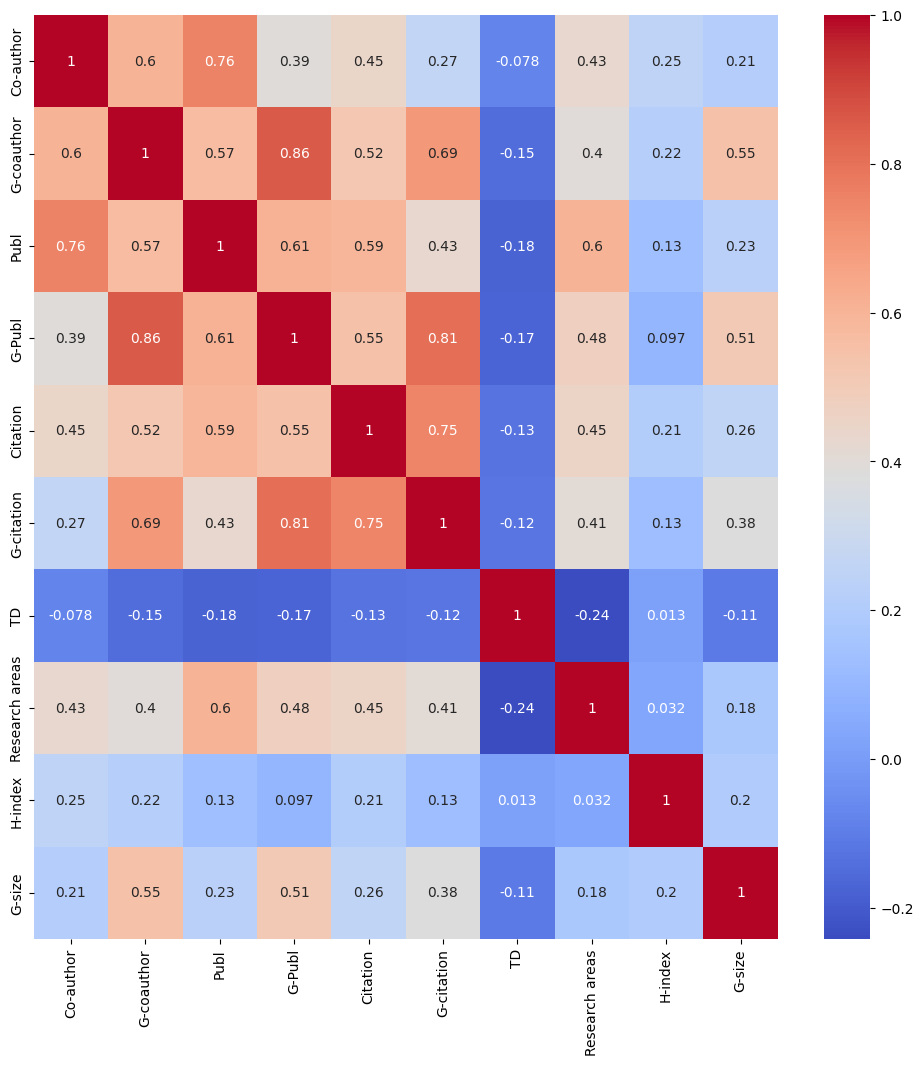

In [81]:
plt.figure(figsize=(12,12))
sns.heatmap(dataframe.iloc[:,1:].corr(), cmap ='coolwarm', annot=True) #method="spearman"
plt.savefig(f"{fig_folder}/metric_correlation.pdf",bbox_inches="tight")
plt.show()

In [82]:
dataframe.shape, dataframe1.shape

((15433, 11), (5110, 11))

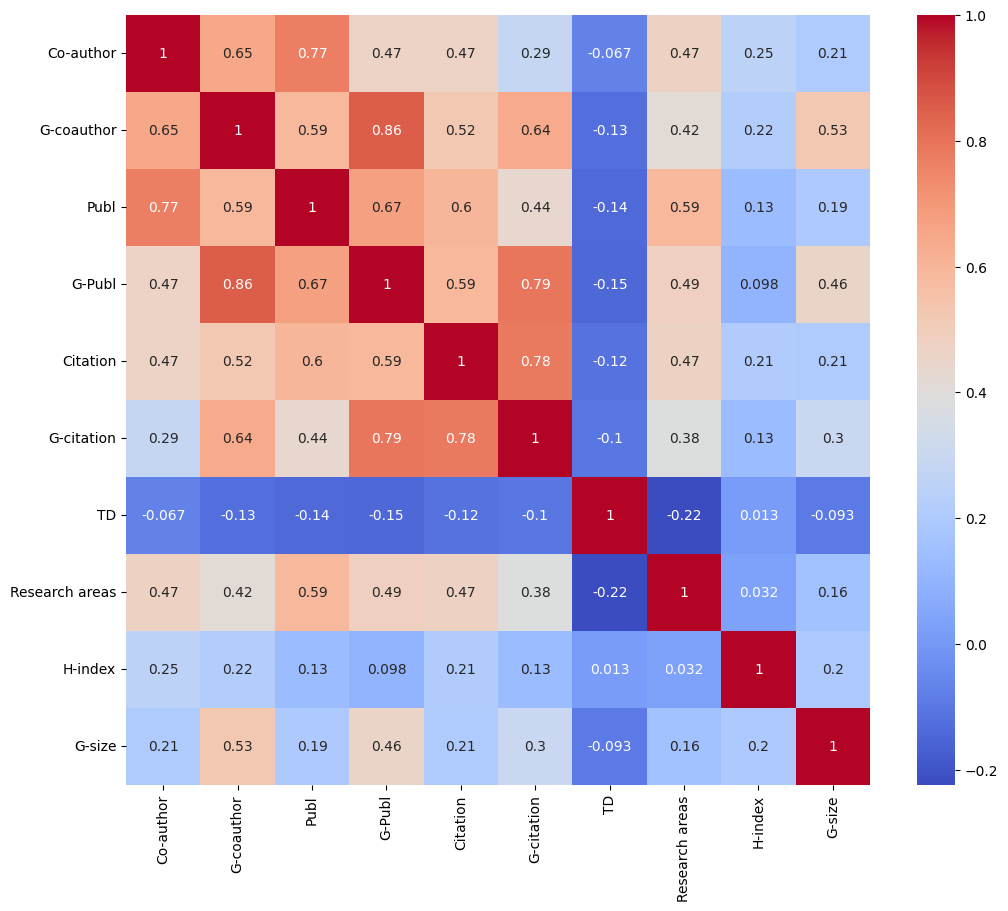

In [83]:
plt.figure(figsize=(12,10))
sns.heatmap(dataframe1.iloc[:,1:].corr(), cmap ='coolwarm', annot=True); #method="spearman"

In [83]:
corr = dataframe.iloc[:,1:].corr()

In [84]:
corr = corr.round(decimals = 2).copy()

In [85]:
corr

,Co-author,G-coauthor,Publ,G-Publ,Citation,G-citation,TD(MJC),TD(KLD),Research areas,H-index,G-size
Co-author,1.00,0.60,0.76,0.39,0.45,0.27,-0.21,-0.08,0.43,0.25,0.21
G-coauthor,0.60,1.00,0.57,0.86,0.52,0.69,-0.19,-0.15,0.40,0.22,0.55
Publ,0.76,0.57,1.00,0.61,0.59,0.43,-0.26,-0.18,0.60,0.13,0.23
G-Publ,0.39,0.86,0.61,1.00,0.55,0.81,-0.19,-0.17,0.48,0.10,0.51
Citation,0.45,0.52,0.59,0.55,1.00,0.75,-0.17,-0.13,0.45,0.21,0.26
G-citation,0.27,0.69,0.43,0.81,0.75,1.00,-0.13,-0.12,0.41,0.13,0.38
TD(MJC),-0.21,-0.19,-0.26,-0.19,-0.17,-0.13,1.00,0.65,-0.28,0.03,-0.09
TD(KLD),-0.08,-0.15,-0.18,-0.17,-0.13,-0.12,0.65,1.00,-0.24,0.01,-0.11
Research areas,0.43,0.40,0.60,0.48,0.45,0.41,-0.28,-0.24,1.00,0.03,0.18
H-index,0.25,0.22,0.13,0.10,0.21,0.13,0.03,0.01,0.03,1.00,0.20


In [86]:
#plt.figure(figsize=(10,12))
#corr.to_csv()

In [87]:
dataframe[~(dataframe["H-index"].isnull())].shape

(5113, 12)

In [88]:
#dataframe[~(dataframe["H-index"].isnull())].iloc[:,1:].corr().round(decimals = 2)

In [89]:
print(corr.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  Co-author &  G-coauthor &  Publ &  G-Publ &  Citation &  G-citation &  TD(MJC) &  TD(KLD) &  Research areas &  H-index &  G-size \\
\midrule
Co-author      &       1.00 &        0.60 &  0.76 &    0.39 &      0.45 &        0.27 &    -0.21 &    -0.08 &            0.43 &     0.25 &    0.21 \\
G-coauthor     &       0.60 &        1.00 &  0.57 &    0.86 &      0.52 &        0.69 &    -0.19 &    -0.15 &            0.40 &     0.22 &    0.55 \\
Publ           &       0.76 &        0.57 &  1.00 &    0.61 &      0.59 &        0.43 &    -0.26 &    -0.18 &            0.60 &     0.13 &    0.23 \\
G-Publ         &       0.39 &        0.86 &  0.61 &    1.00 &      0.55 &        0.81 &    -0.19 &    -0.17 &            0.48 &     0.10 &    0.51 \\
Citation       &       0.45 &        0.52 &  0.59 &    0.55 &      1.00 &        0.75 &    -0.17 &    -0.13 &            0.45 &     0.21 &    0.26 \\
G-citation     &       0.27 &        0.69 &  0.43 &    0.81 &   

/tmp/ipykernel_49868/496402970.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corr.to_latex())


In [90]:
dataframe.columns[1:]

Index(['Co-author', 'G-coauthor', 'Publ', 'G-Publ', 'Citation', 'G-citation',
       'TD(MJC)', 'TD(KLD)', 'Research areas', 'H-index', 'G-size'],
      dtype='object')

In [91]:
dataframe.shape

(15433, 12)

In [92]:
#dataframe[['head_id','co_author','group_coauthor','citation','group_citation','publication','group_publ']]

In [93]:
#dataframe["citation"].plot(kind="kde")

In [94]:
dataframe.columns

Index(['head_id', 'Co-author', 'G-coauthor', 'Publ', 'G-Publ', 'Citation',
       'G-citation', 'TD(MJC)', 'TD(KLD)', 'Research areas', 'H-index',
       'G-size'],
      dtype='object')

### Relationship between academic output and topic deviation

In [305]:
# rel_col        = "H-index"
# excellence_col = "Peaks(MJC)"

In [174]:
rel_col        = "G-size"
excellence_col = "TD(KLD)"

In [175]:
sorted_df = dataframe.sort_values(by=rel_col).copy()

In [176]:
grp_cite = sorted_df.loc[~(sorted_df[excellence_col].isna()),excellence_col].sort_values(ascending=False).values.copy()
kl       = KneeLocator(range(0, grp_cite.shape[0]), grp_cite, curve="convex", direction="decreasing", interp_method="polynomial")

In [177]:
elbow_value = kl.elbow_y

In [178]:
elbow_value

0.0034570879806215507

In [179]:
#(kl.elbow_y- elbow_value/10, kl.elbow_y+ elbow_value/10)

In [180]:
def func_flag(value):
    global elbow_value
    #val= elbow_value/10
    #mid_value = #(elbow_value-val, elbow_value+val)
    if np.isnan(value) == False:
        if value < elbow_value:
            return "low"
#         elif value >= mid_value[0] and value < mid_value[1]:
#             return "mid"
        elif value >= elbow_value:
            return "high"
        else:
            return np.nan
    else:
        return np.nan

In [181]:
excellence_col_flag = f"{excellence_col}_flag"

In [182]:
sorted_df[excellence_col_flag] = sorted_df[excellence_col].apply(func_flag)

In [183]:
sorted_df= sorted_df[~sorted_df[rel_col].isnull()].copy()

In [184]:
#sorted_df.loc[sorted_df[excellence_col_flag]=="low", rel_col].values

In [185]:
#sorted_df[~(sorted_df[excellence_col_flag].isnull())]

In [186]:
#sorted_df= sorted_df[~(sorted_df[excellence_col_flag].isnull())].copy()

In [187]:
# low = sorted_df[sorted_df[excellence_col_flag]=="low"][rel_col].values.copy()
# high = sorted_df[sorted_df[excellence_col_flag]=="high"][rel_col].values.copy()
# fig, ax = plt.subplots()
# ax.boxplot(low,positions=[2],labels=[f"Low \n {excellence_col}"])
# # ax.boxplot(sorted_df.loc[sorted_df[excellence_col_flag]=="mid", rel_col].sort_values().values, positions=[4], labels=[f"Medium \n {excellence_col}"])
# ax.boxplot(high, positions=[6], labels=[f"High \n {excellence_col}"])
# #ax.legend()
# plt.ylabel(f"{rel_col} values")
# plt.xlabel("Researcher Group Types")
# plt.savefig(f"{fig_folder}/relation_bw_{rel_col}_{excellence_col}.pdf",bbox_inches="tight")
# plt.show()

In [190]:
fig_folder

'figs_new'

In [188]:
excellence_col_flag

'TD(KLD)_flag'

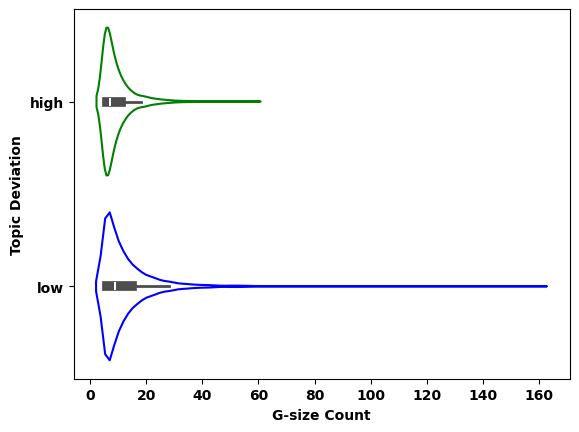

In [189]:
fig, ax = plt.subplots()
sns.violinplot(data=sorted_df, x=rel_col, y=excellence_col_flag,hue=excellence_col_flag,order=["high","low"],palette=["blue","green"],saturation=0.6, fill=False, inner_kws=dict(box_width=7, whis_width=2, color="0.3"))
plt.ylabel(f"Topic Deviation", fontweight='bold')
plt.xlabel(f"{rel_col} Count", fontweight='bold')
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')
plt.savefig(f"{fig_folder}/relation_bw_{rel_col}_{excellence_col}.pdf",bbox_inches="tight")
plt.show()

In [255]:
# fig = plt.figure()
# plt.plot(sorted_df.loc[sorted_df[excellence_col_flag]=="low",rel_col].values,label="low")
# plt.plot(sorted_df.loc[sorted_df[excellence_col_flag]=="mid",rel_col].sort_values().values,label="mid")
# plt.plot(sorted_df.loc[sorted_df[excellence_col_flag]=="high",rel_col].values, label="high")
# plt.legend()
# plt.ylabel("Topic Deviation")
# plt.xlabel("Researcher Groups")
# plt.show()

In [165]:
#sorted_df[sorted_df[excellence_col_flag]=="mid"].shape

In [154]:
excellence_col_flag

'TD(KLD)_flag'

In [155]:
sorted_df[sorted_df[excellence_col_flag]=="high"].shape

(740, 13)

In [156]:
sorted_df[sorted_df[excellence_col_flag]=="high"][rel_col].mean()

39.75135135135135

In [157]:
sorted_df[sorted_df[excellence_col_flag]=="high"][rel_col].std()

28.846011036268624

In [158]:
sorted_df[sorted_df[excellence_col_flag]=="low"].shape

(4373, 13)

In [159]:
sorted_df[sorted_df[excellence_col_flag]=="low"][rel_col].mean()

38.69951978047107

In [160]:
sorted_df[sorted_df[excellence_col_flag]=="low"][rel_col].std()

27.406095051510842

In [135]:
sorted_df[sorted_df[excellence_col_flag]== "low"].sample(5)

,head_id,Co-author,G-coauthor,Publ,G-Publ,TD(MJC),Peaks(MJC),TD(KLD),Peaks(KLD),Citation,G-citation,HE(KLD),HE(MJC),Research areas,H-index,G-size,TD(KLD)_flag
4035,17254,44.0,63,152.0,211.0,0.000046,6,0.000355,7,1928.0,2313.0,0.638459,0.706787,7.0,NaN,6,low
9930,48007,88.0,525,93.0,496.0,0.000067,6,0.001284,5,1248.0,2610.0,0.000000,0.000000,6.0,81.0,39,low
2065,6187,25.0,117,87.0,306.0,0.000076,5,0.001959,6,654.0,938.0,0.000000,0.000000,8.0,9.0,11,low
1418,4453,5.0,8,23.0,26.0,0.000572,4,0.000893,3,54.0,62.0,0.000000,0.000000,5.0,NaN,5,low
9813,37505,11.0,20,22.0,33.0,0.000603,3,0.000846,5,199.0,210.0,0.000000,0.000000,7.0,NaN,5,low


In [ ]:
#dataframe.sample(1)

In [ ]:
#mgpid2publ_count[200999]

### Model Training for academic output prediction
Training the model with researchers attributes to predict the H-index.

In [120]:
Predict_name= "Citation"

In [121]:
dataset_df = dataframe[~(dataframe[Predict_name].isnull())].copy()

In [122]:
dataset_df.fillna(0, inplace=True)

In [123]:
dataset= (dataset_df-dataset_df.min())/(dataset_df.max()-dataset_df.min())

In [124]:
#dataset=(dataset_df-dataset_df.mean())/dataset_df.std()

In [125]:
#without_hindex = dataframe[(dataframe["H-index"].isnull())]["head_id"].values.copy()

In [126]:
#np.save("group_id_without_hindex.npy",without_hindex)
#group_id = np.load("group_id_without_hindex.npy")

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [128]:
dataset.columns

Index(['head_id', 'Co-Author', 'Group-Coauthor', 'Publ', 'Group-Publ',
       'Topic-Deviation(MJC)', 'Peaks(MJC)', 'Topic-Deviation(KLD)',
       'Peaks(KLD)', 'Citation', 'Group-Citation', 'PR', 'BC',
       'Hurst-Exp(KLD)', 'Hurst-Exp(MJC)', 'Topics', 'H-index'],
      dtype='object')

In [129]:
# imp =['Co_author', 'Group_coauthor', 'Publication', 'Group_publ',
#        'Std_MJC', 'Peak_MJC', 'Std_KL', 'Peak_KL', 'Citation',
#        'Group_citation', 'Hurst_exp_KL', 'Hurst_exp_MJC']

In [130]:
features = dataset[['Topic-Deviation(MJC)', 'Peaks(MJC)', 'Topic-Deviation(KLD)', 'Peaks(KLD)', 'Hurst-Exp(KLD)', 'Hurst-Exp(MJC)']].values.copy()

In [131]:
labels = dataset[Predict_name].values.copy()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)

In [133]:
print(f"Train size = {X_train.shape}, Test Size = {X_test.shape}")

Train size = (11494, 6), Test Size = (2874, 6)


In [169]:
clf = RandomForestRegressor(n_estimators=500,max_depth=20, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=0)

In [170]:
y_pred = clf.predict(X_test)

In [171]:
#predict_labels

In [172]:
mean_squared_error(y_test, y_pred) #0.010764165808981846

0.002147938547819947

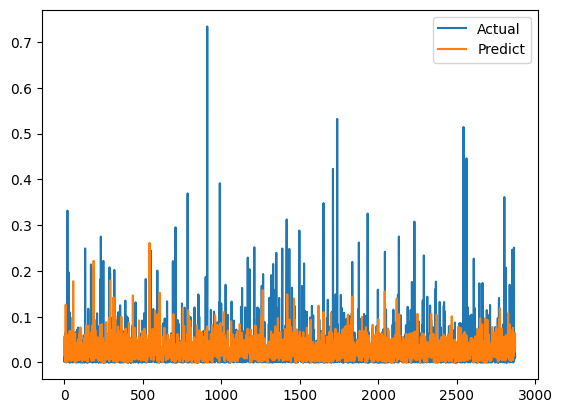

In [173]:
fig = plt.figure()
plt.plot(range(len(y_test)), y_test, label= "Actual")
plt.plot(range(len(y_test)), y_pred, label= "Predict")
plt.legend()
plt.show()

### Same researcher can acts as both a advisor (After Ph.D.) of a group and a advisee (Before Ph.D.) in another group

In [50]:
total_researchers_in_groups = np.sum([len(v) for k,v in groups.items()])

In [51]:
total_researchers_in_groups 
# same researcher can acts as both a advisor (After Ph.D.) of a group and advisee (Before Ph.D.) in another group

182701

In [58]:
total_unique_researchers_in_groups = len(set([r for k,v in groups.items() for r in v]))

In [59]:
total_unique_researchers_in_groups

167121

In [174]:
#np.log(norm_distance_kl[0][0])

In [175]:
norm_distance_kl[0]

[1.0556964875913426,
 1.0543104129174778,
 1.0801004380913322,
 1.0653032398085833,
 1.17549462917348,
 1.1876270772241002,
 1.023144982274858,
 1.1544928458949935,
 1.1701839052026586,
 1.0518802157520672,
 1.0,
 1.0,
 1.0,
 1.0,
 1.045682758901331]

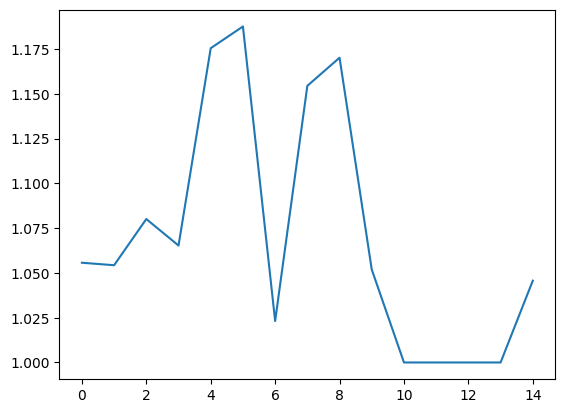

In [176]:
plt.plot(norm_distance_kl[0])

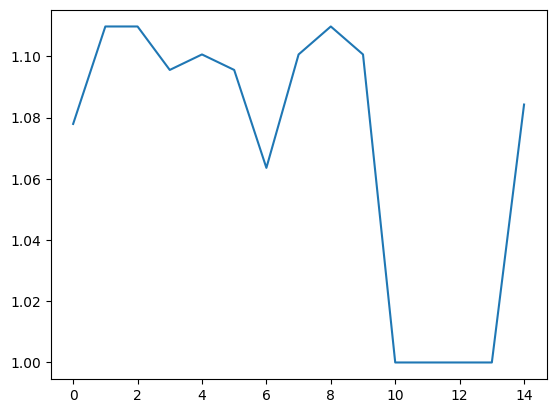

In [177]:
plt.plot(norm_distance_tau[0])

In [57]:
np.exp(np.std(norm_distance_tau[0]))

1.0425544610930997

In [86]:
#mgpid2_publ_area

{213374: ['Computer science'],
 197667: ['Associative rings and algebras'],
 130193: ['Biology and other natural sciences',
  'Game theory, economics, social and behavioral sciences',
  'Other',
  'Probability theory and stochastic processes',
  'Statistics'],
 165155: ['Associative rings and algebras', 'Other'],
 101275: ['Fluid mechanics', 'Geophysics'],
 23681: ['Topological groups, Lie groups'],
 175205: ['Quantum theory'],
 183162: ['Calculus of variations and optimal control; optimization',
  'Functional analysis',
  'Numerical analysis',
  'Operations research, mathematical programming',
  'Operator theory',
  'Sequences, series, summability'],
 13636: ['Commutative rings and algebras', 'Other'],
 80288: ['Numerical analysis', 'Other'],
 15227: ['Group theory and generalizations', 'Other'],
 210174: ['Biology and other natural sciences',
  'Game theory, economics, social and behavioral sciences'],
 122683: ['Computer science', 'Numerical analysis'],
 182539: ['Probability theory

In [103]:
sort_metrics= sorted(metric_std_kl.items(), key=lambda x : x[1])

In [135]:
idd = sort_metrics[500]

In [136]:
idd

(87453, 0.0)

In [127]:
index = group_head_id.index(idd[0])

In [128]:
norm_distance_kl[index]

[1.0]

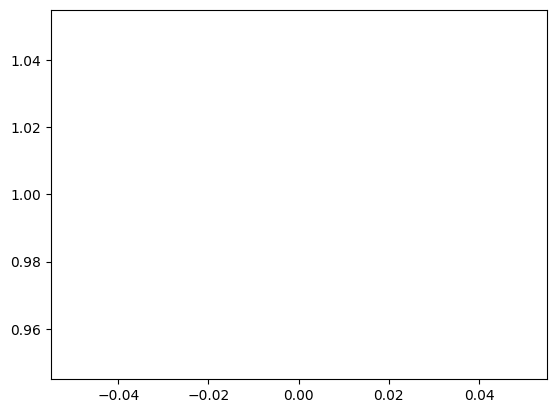

In [129]:
plt.plot(norm_distance_kl[index])

In [130]:
mgpid2_publ_area[idd[0]]

['Other', 'Topology']

In [196]:
#import tensorflow as tf

In [197]:
#tf.config.get_visible_devices("GPU")

In [198]:
# rbf    = lambda d, phi: np.exp(-d/(2*phi))
# var    =  np.var(dist)
# g_dist = [rbf(a, var) for a in dist]

In [199]:
# dist =  [4,6,10,12,10]

In [200]:
# g_dist